In [1]:
import dill as pickle
import sympy as sp

with open('taylor_series_sympy.pkl', 'rb') as f:
    taylor_series = pickle.load(f)

In [2]:
bx_taylor_series = taylor_series['Bx']
by_taylor_series = taylor_series['By']
bz_taylor_series = taylor_series['Bz']

In [3]:
D = sp.symbols('D', positive=True, real=True)
R = D * sp.Rational(1,2)
L = sp.symbols('L', positive=True, real=True)
Delta_x =  0#sp.symbols('Delta_x')
Delta_y =  0#sp.symbols('Delta_y')
Delta_z = sp.symbols('Delta_z', positive=True, real=True)
B0 = sp.symbols('B0', positive=True, real=True)

display(sp.factor_terms(bz_taylor_series[0][0](R, L, Delta_x, Delta_y, Delta_z, B0)).as_ordered_factors()[1])
sp.nsimplify(sp.factor_terms(bz_taylor_series[0][0](R, L, Delta_x, Delta_y, Delta_z, B0)).as_ordered_factors()[-1].as_ordered_terms()[0].simplify()).simplify()

B0

(2*Delta_z + L)/sqrt(D**2 + (2*Delta_z + L)**2)

In [4]:
pi_subs = {
    sp.Rational(628318530717959 , 100000000000000) : 2 * sp.pi,
    3.14159265358979 : sp.pi,
    2 * 3.14159265358979 : 2 * sp.pi,
    - 3.14159265358979 : - sp.pi,
    sp.Rational(314159265358979, 100000000000000) : sp.pi,
}

subs = {
    ((2 * Delta_z + L)**2).expand() : ((2 * Delta_z + L)**2),
    ((2 * Delta_z - L)**2).expand() : ((2 * Delta_z - L)**2),
    4* ((2 * Delta_z + L)**2).expand() : 4* ((2 * Delta_z + L)**2),
    4* ((2 * Delta_z - L)**2).expand() : 4* ((2 * Delta_z - L)**2),
    8 * ((2 * Delta_z + L)**4).expand() : 8 * ((2 * Delta_z + L)**4),
    8 * ((2 * Delta_z - L)**4).expand() : 8 * ((2 * Delta_z - L)**4),
}

def simplify_term(term):
        
    term = sp.nsimplify(term).subs(pi_subs)

    factors = sp.factor_terms(term).as_ordered_factors()
    new_factors = []

    
    for factor in factors:
        if isinstance(factor, sp.Add):
            terms = factor.as_ordered_terms()
            new_terms = []
            for t in terms:
                t = sp.nsimplify(t.simplify()).factor().simplify()
                n, d = t.as_numer_denom()
                n = n.simplify()
                d = d.simplify()
                new_terms.append(n / d)
            new_factors.append(sp.Add(*new_terms))
        else:
            if isinstance(factor, sp.Mul):
                factor = simplify_term(factor)
            new_factors.append(sp.nsimplify(factor))

    return sp.factor_terms(sp.Mul(*new_factors).subs(pi_subs).subs(subs))

In [5]:
D_r = sp.symbols('D_r', positive=True, real=True)

subs_dr = {
    Delta_x**2 + Delta_y**2 : D_r**2,
}

simplify_term(bz_taylor_series[0][0](R, L, Delta_x, Delta_y, Delta_z, B0).subs(subs_dr).as_ordered_factors()[-1].as_ordered_terms()[0].as_ordered_factors()[-1].as_ordered_terms()[0])

-Delta_z

In [6]:
b0 = simplify_term(bz_taylor_series[0][0](R, L, Delta_x, Delta_y, Delta_z, B0))
b0

2*pi*B0*((2*Delta_z + L)/sqrt(D**2 + (2*Delta_z + L)**2) + (-2*Delta_z + L)/sqrt(D**2 + (2*Delta_z - L)**2))

In [7]:
b2 = (simplify_term(bz_taylor_series[2][0](R, L, Delta_x, Delta_y, Delta_z, B0)) + simplify_term(bz_taylor_series[2][2](R, L, Delta_x, Delta_y, Delta_z, B0)))
b2

-12*pi*B0*D**2*(-(2*Delta_z + L)/(D**2 + (2*Delta_z + L)**2)**(5/2) + (2*Delta_z - L)/(D**2 + (2*Delta_z - L)**2)**(5/2))

In [8]:
terms_ = [t for t in (bz_taylor_series[4][2](R, L, Delta_x, Delta_y, Delta_z, B0)).as_ordered_factors()[-1].as_ordered_terms()]
new_terms = [
    terms_[0].nsimplify().simplify(),
    terms_[1].nsimplify().simplify(),
    simplify_term(terms_[2].nsimplify().simplify()).factor().simplify().subs(subs),
    simplify_term(terms_[3].nsimplify().simplify()).factor().simplify().subs(subs),
    simplify_term(terms_[4]),
]

new_terms = [sp.factor_terms(t) for t in new_terms]

In [9]:
b4 = (sp.factor_terms(sp.factor_terms(sp.factor_terms(sp.Add(*[t.factor() for t in sp.Add(*new_terms).collect([2*Delta_z + L, 2*Delta_z - L]).as_ordered_terms()]).subs(subs) * sp.Mul(*(bz_taylor_series[4][2](R, L, Delta_x, Delta_y, Delta_z, B0)).as_ordered_factors()[:-1]).nsimplify().subs(pi_subs)) + sp.factor_terms(3 * simplify_term(bz_taylor_series[4][0](R, L, Delta_x, Delta_y, Delta_z, B0)) + 3 * simplify_term(bz_taylor_series[4][-1](R, L, Delta_x, Delta_y, Delta_z, B0)))).collect([-3*D**2 + 4 * (2*Delta_z + L)**2, -(3*D**2 - 4 * (2*Delta_z + L)**2)])))
b4

-60*pi*B0*D**2*((-3*D**2 + 4*(2*Delta_z + L)**2)*(2*Delta_z + L)/(D**2 + (2*Delta_z + L)**2)**(9/2) + (3*D**2 - 4*(2*Delta_z - L)**2)*(2*Delta_z - L)/(D**2 + (2*Delta_z - L)**2)**(9/2))

In [10]:
x_0 = sp.symbols('x_0', real=True, positive=True)

xi_plus, xi_minus = sp.symbols('xi_+ xi_-', real=True, positive=True)

subs_xi = {
    2 * Delta_z + L : xi_plus,
    2 * Delta_z - L : xi_minus
}


sp.factor_terms((b0 + x_0**2 * b2 + x_0**4 * b4).subs(subs_xi))

2*pi*B0*(-30*D**2*x_0**4*(xi_+*(-3*D**2 + 4*xi_+**2)/(D**2 + xi_+**2)**(9/2) + xi_-*(3*D**2 - 4*xi_-**2)/(D**2 + xi_-**2)**(9/2)) - 6*D**2*x_0**2*(-xi_+/(D**2 + xi_+**2)**(5/2) + xi_-/(D**2 + xi_-**2)**(5/2)) + xi_+/sqrt(D**2 + xi_+**2) - xi_-/sqrt(D**2 + xi_-**2))

In [11]:
xi = sp.symbols('xi', real=True, positive=True)

f = lambda xi, n: sp.sqrt(D**2 + xi**2).diff(xi, n).factor().simplify()

2 * sp.pi * B0 * (f(xi_plus, 1) - f(xi_minus, 1) - 2 * x_0**2 * sp.factor_terms(f(xi_plus, 3) - f(xi_minus, 3)) + 2 * x_0**4 * sp.factor_terms(f(xi_plus, 5) - f(xi_minus, 5)))

2*pi*B0*(30*D**2*x_0**4*(xi_+*(3*D**2 - 4*xi_+**2)/(D**2 + xi_+**2)**(9/2) - xi_-*(3*D**2 - 4*xi_-**2)/(D**2 + xi_-**2)**(9/2)) - 6*D**2*x_0**2*(-xi_+/(D**2 + xi_+**2)**(5/2) + xi_-/(D**2 + xi_-**2)**(5/2)) + xi_+/sqrt(D**2 + xi_+**2) - xi_-/sqrt(D**2 + xi_-**2))

# Driving Terms

In [12]:
tau = 6.283185307179586

bx1 = simplify_term(bx_taylor_series[1][1](R, L, Delta_x, Delta_y, Delta_z, B0).subs(tau/8, 2*sp.pi/8))
by1 = simplify_term(by_taylor_series[1][0](R, L, Delta_x, Delta_y, Delta_z, B0).subs(tau/8, 2*sp.pi/8))

bx3 = sp.factor_terms(simplify_term(bx_taylor_series[3][-1](R, L, Delta_x, Delta_y, Delta_z, B0).expand().subs(3/16 * tau, sp.Rational(3, 8) * sp.pi).subs(15/128/2*tau, sp.Rational(15, 128) * sp.pi))).collect(D)
by3 = sp.factor_terms(simplify_term(by_taylor_series[3][0](R, L, Delta_x, Delta_y, Delta_z, B0).expand().subs(3/16 * tau, sp.Rational(3, 8) * sp.pi).subs(15/128/2*tau, sp.Rational(15, 128) * sp.pi))).collect(D)

bx_xyy = sp.factor_terms(simplify_term(bx_taylor_series[3][1](R, L, Delta_x, Delta_y, Delta_z, B0).expand().subs(3/16 * tau, sp.Rational(3, 8) * sp.pi).subs(15/128/2*tau, sp.Rational(15, 128) * sp.pi))).collect(D)
by_xxy = sp.factor_terms(simplify_term(by_taylor_series[3][-2](R, L, Delta_x, Delta_y, Delta_z, B0).expand().subs(3/16 * tau, sp.Rational(3, 8) * sp.pi).subs(15/128/2*tau, sp.Rational(15, 128) * sp.pi))).collect(D)

In [13]:
sp.factor_terms(bx1 + x_0**2 * (2 * bx_xyy + 6 * bx3)).subs(subs_xi)

2*pi*B0*D**2*(12*x_0**2*(5*D**2*(-1/(D**2 + xi_-**2)**(7/2) + (D**2 + xi_+**2)**(-7/2)) + 4/(D**2 + xi_-**2)**(5/2) - 4/(D**2 + xi_+**2)**(5/2)) - 1/(D**2 + xi_-**2)**(3/2) + (D**2 + xi_+**2)**(-3/2))

In [27]:
sp.factor_terms(by1 + x_0**2 * (2 * by_xxy + 6 * by3)).subs(subs_xi)

2*pi*B0*D**2*(12*x_0**2*(5*D**2*(-1/(D**2 + xi_-**2)**(7/2) + (D**2 + xi_+**2)**(-7/2)) + 4/(D**2 + xi_-**2)**(5/2) - 4/(D**2 + xi_+**2)**(5/2)) - 1/(D**2 + xi_-**2)**(3/2) + (D**2 + xi_+**2)**(-3/2))

In [28]:
12 * x_0**2 * D**2 * ((5 * D**2 / (D**2 + xi_plus**2)**(sp.Rational(7,2)) - 4 / (D**2 + xi_plus**2)**(sp.Rational(5,2))).simplify()) + D**2/(D**2 + xi_plus**2)**(sp.Rational(3,2))

12*D**2*x_0**2*(D**2 - 4*xi_+**2)/(D**2 + xi_+**2)**(7/2) + D**2/(D**2 + xi_+**2)**(3/2)

In [29]:
sp.factor_terms(2 * sp.pi * B0 * (f(xi_plus, 2) - 4 * x_0**2 * f(xi_plus, 4) - f(xi_minus, 2) + 4 * x_0**2 * f(xi_minus, 4)).collect(12 * x_0**2))

2*pi*B0*D**2*(12*x_0**2*((D - 2*xi_+)*(D + 2*xi_+)/(D**2 + xi_+**2)**(7/2) - (D - 2*xi_-)*(D + 2*xi_-)/(D**2 + xi_-**2)**(7/2)) - 1/(D**2 + xi_-**2)**(3/2) + (D**2 + xi_+**2)**(-3/2))

In [33]:
bx1.subs({
    B0: 1,
    D: 60,
    Delta_z : 150,
    L : 60
}).evalf()

-0.00102872347838794

In [42]:
sp.factor_terms(bx1).subs({
    B0: 1,
    D: 60,
    Delta_z : 150,
    L : 60
}).evalf()

-0.00102872347838794

In [46]:
(bx1 + 0.49**2 * 60**2 * (2 * bx_xyy + 6 * bx3)).subs({
    B0: 1,
    D: 60,
    Delta_z : 150,
    L : 60
}).evalf()

-0.000230392981933352

In [37]:
(1/sp.sqrt(2)).evalf()**2 * (60)**2 * (2 * bx_xyy + 6 * bx3).subs({
    B0: 1,
    D: 60,
    Delta_z : 150,
    L : 60
}).evalf()

0.00166249582768551

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Dr = np.linspace(0, 2, 100)
bx_1 = []
by_1 = []

bx_3 = []
by_3 = []

bz_1 = []
bz_3 = []

r = 0.5

for dr  in Dr:
    bx_1_ = []
    for b in bx_taylor_series[1]:
        bx_1_.append(b(r, 1, 0, dr, 150/60, 1))
    bx_1.append(bx_1_)

    by_1_ = []
    for b in by_taylor_series[1]:
        by_1_.append(b(r, 1, 0, dr, 150/60, 1))
    by_1.append(by_1_)

    bz_1_ = []
    for b in bz_taylor_series[1]:
        bz_1_.append(b(r, 1, 0, dr, 150/60, 1))
    bz_1.append(bz_1_)

    bx_3_ = []
    for b in bx_taylor_series[3]:
        bx_3_.append(b(r, 1, 0, dr, 150/60, 1))
    bx_3.append(bx_3_)

    by_3_ = []
    for b in by_taylor_series[3]:
        by_3_.append(b(r, 1, 0, dr, 150/60, 1))
    by_3.append(by_3_)
    
    bz_3_ = []
    for b in bz_taylor_series[3]:
        bz_3_.append(b(r, 1, 0, dr, 150/60, 1))
    bz_3.append(bz_3_)

Text(0.5, 0, 'Dr')

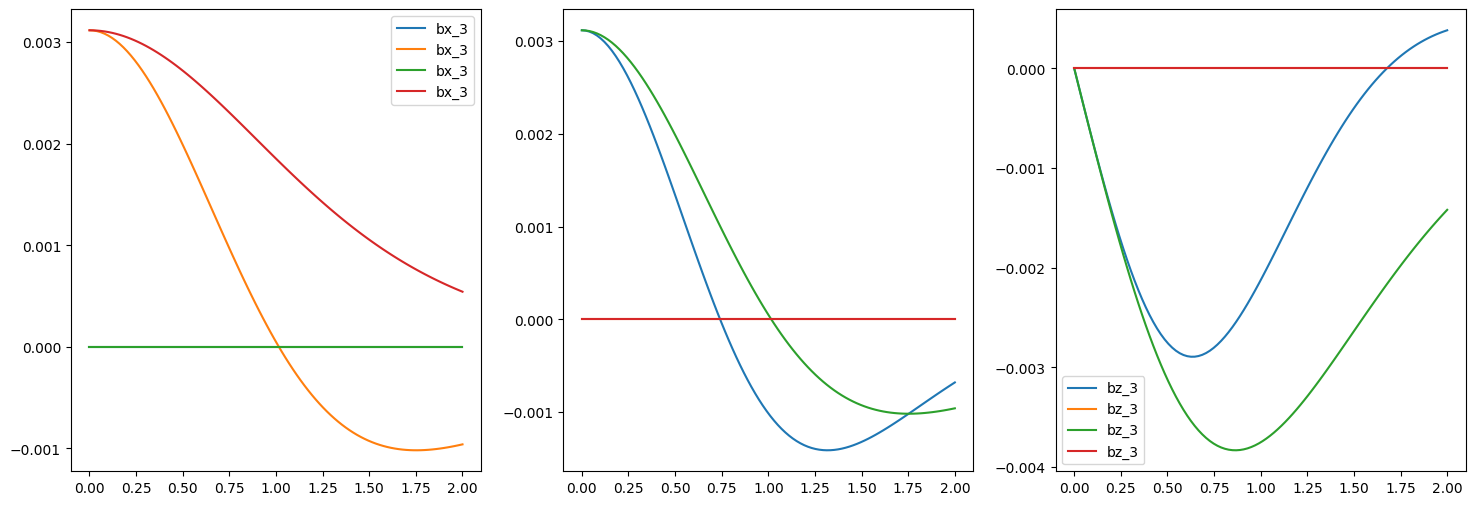

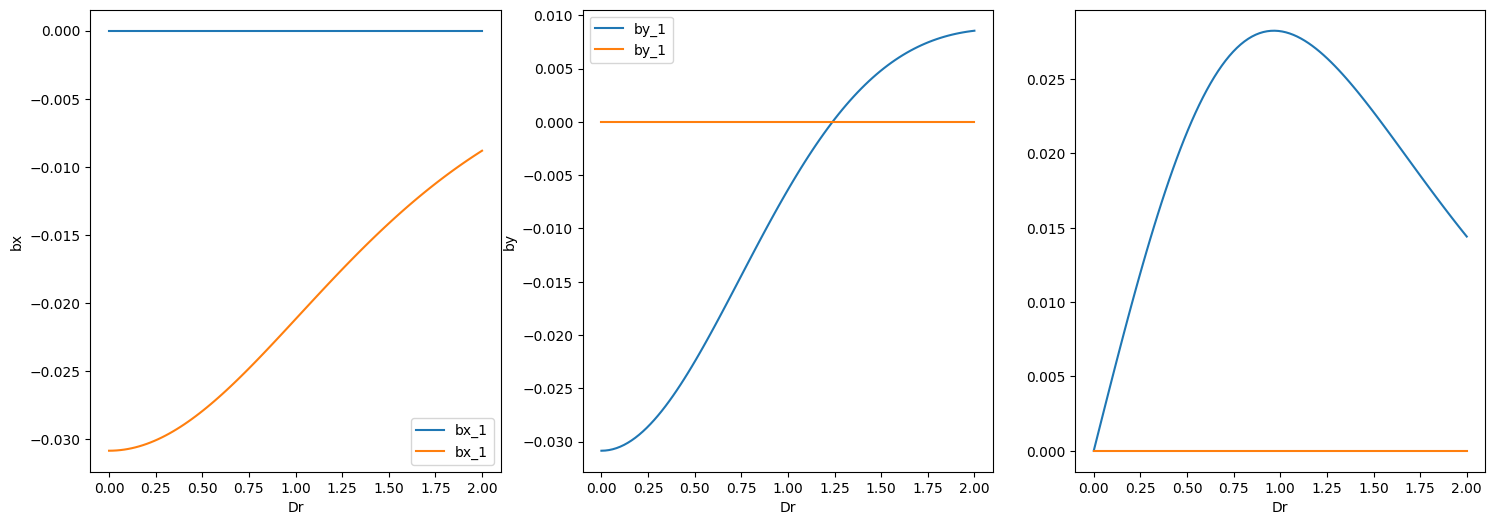

In [7]:
fig, axs = plt.subplots(1,3,figsize=(18, 6))
x0 = 0.5

bx_3 = np.array(bx_3)
by_3 = np.array(by_3)
bz_3 = np.array(bz_3)
ax = axs[0]
for b in bx_3.T:
    b = b * x0**3
    ax.plot(Dr, b, label='bx_3')
ax.legend()
ax = axs[1]
for b in by_3.T:
    b = b * x0**3
    ax.plot(Dr, b, label='by_3')
ax = axs[2]
for b in bz_3.T:
    b = b * x0**3
    ax.plot(Dr, b, label='bz_3')


ax.legend()
fig, axs = plt.subplots(1,3,figsize=(18, 6))
bx_1 = np.array(bx_1)
by_1 = np.array(by_1)
bz_1 = np.array(bz_1)
ax = axs[0]
for b in bx_1.T:
    b = b * x0
    ax.plot(Dr, b, label='bx_1')
ax.set_xlabel('Dr')
ax.set_ylabel('bx')
ax.legend()
ax = axs[1]
for b in by_1.T:
    b = b * x0
    ax.plot(Dr, b, label='by_1')
ax.set_xlabel('Dr')
ax.set_ylabel('by')
ax.legend()
ax = axs[2]
for b in bz_1.T:
    b = b * x0
    ax.plot(Dr, b, label='bz_1')
ax.set_xlabel('Dr') 

/tmp/ipykernel_380625/499252927.py:62: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


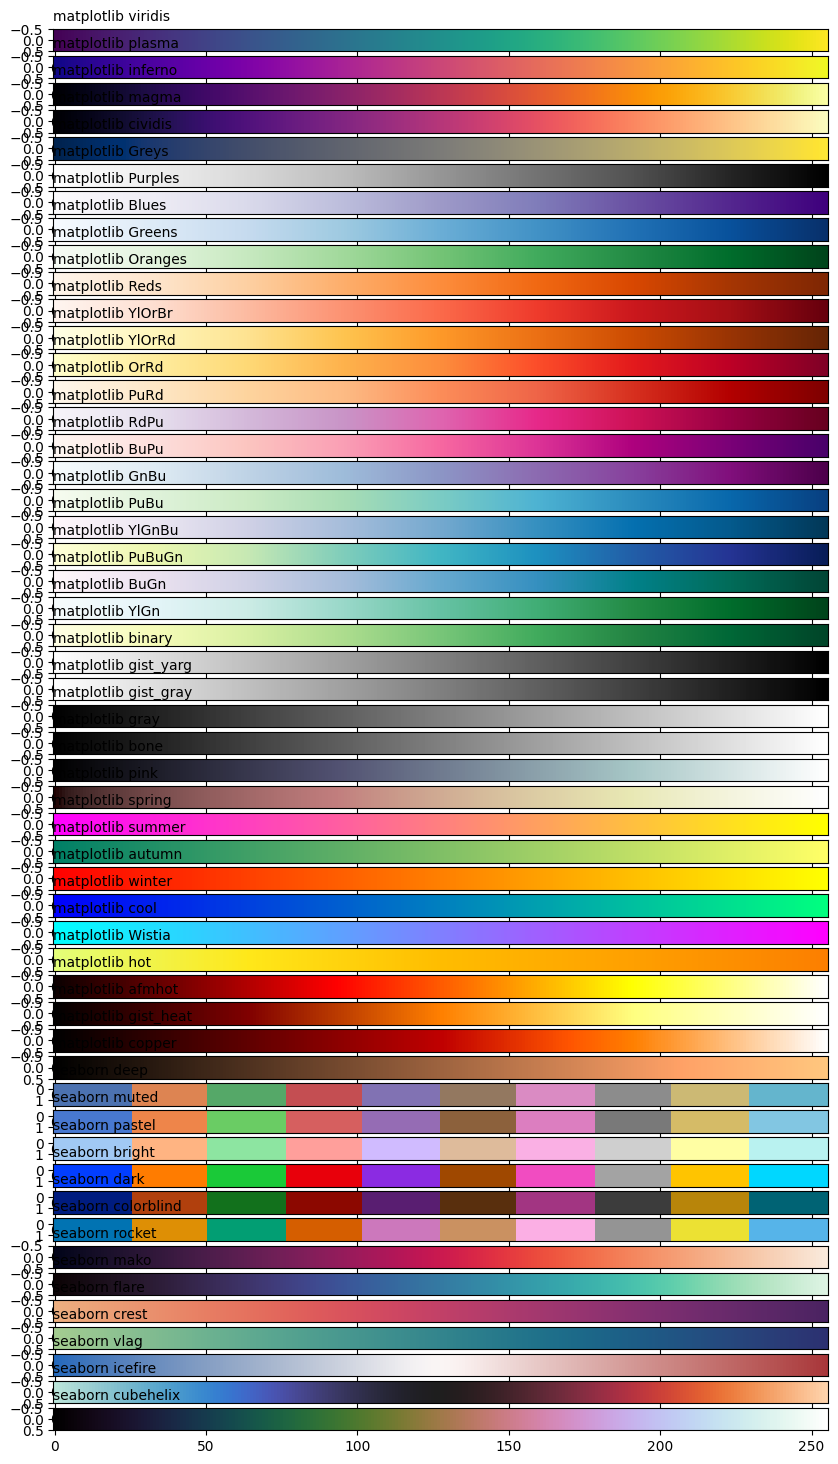

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# ----------------------------
# Matplotlib colormaps (popular/beautiful)
# ----------------------------
mpl_cmaps = [
    "viridis", "plasma", "inferno", "magma", "cividis",
    "Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
    "YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu",
    "BuPu", "GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn",
    "binary", "gist_yarg", "gist_gray", "gray", "bone", "pink",
    "spring", "summer", "autumn", "winter",
    "cool", "Wistia", "hot", "afmhot", "gist_heat", "copper"
]

# ----------------------------
# Seaborn palettes
# ----------------------------
sns_palettes = [
    'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind',
    'rocket', 'mako', 'flare', 'crest', 'vlag', 'icefire', 'cubehelix'
]

# Combine both lists with labels
all_names = mpl_cmaps + sns_palettes
all_types = ['matplotlib']*len(mpl_cmaps) + ['seaborn']*len(sns_palettes)

# ----------------------------
# Plot setup
# ----------------------------
fig, axes = plt.subplots(len(all_names), 1, figsize=(10, len(all_names)*0.35))

# Horizontal gradient
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# ----------------------------
# Plot each colormap/palette
# ----------------------------
for ax, name, typ in zip(axes, all_names, all_types):
    if typ == 'matplotlib':
        cmap = plt.get_cmap(name)
        ax.imshow(gradient, aspect='auto', cmap=cmap)
    else:
        # For discrete palettes, pick number of colors
        if name in ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']:
            pal = sns.color_palette(name, n_colors=10)  # discrete
            cmap = mcolors.ListedColormap(pal)
            # Repeat gradient to match discrete steps
            gradient_discrete = np.tile(np.linspace(0, 9, 256), (2,1))
            ax.imshow(gradient_discrete, aspect='auto', cmap=cmap)
        else:
            # continuous palettes
            pal = sns.color_palette(name, as_cmap=True)
            ax.imshow(gradient, aspect='auto', cmap=pal)

    #ax.set_axis_off()
    ax.set_title(typ + " " + name, fontsize=10, loc='left')

plt.tight_layout()
plt.show()


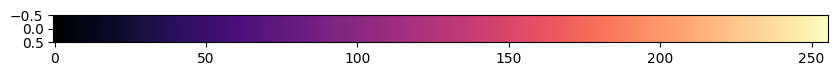

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 0.35))
ax.imshow(gradient, aspect='auto', cmap='magma')